# Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('final_data.csv')
data.head()

,Fuel Type,body_type,kms_driven,transmission_type,ownerNo,manufacturer,model,price,mileage(kmpl),max_power(bhp),Seats,Insurance Validity,Engine Displacement(cc),Car_Age
0,4,2,120000,1,3,20,142,400000.0,23.10,67.04,5,7,998,9
1,4,7,32706,1,2,6,47,811000.0,17.00,121.31,5,2,1497,6
2,4,2,11949,1,1,29,242,585000.0,23.84,84.00,5,2,1199,6
3,4,8,17794,1,1,9,81,462000.0,19.10,81.86,5,2,1197,10
4,1,7,60000,1,1,20,157,790000.0,23.65,88.50,5,7,1248,9


# Skewness in Data

In [3]:
df = data.copy()

In [4]:
df.skew()

Fuel Type                  -0.759502
body_type                  -0.074542
kms_driven                 51.918237
transmission_type          -1.047433
ownerNo                     1.859963
manufacturer                0.106465
model                       0.359140
price                       6.710482
mileage(kmpl)               5.074674
max_power(bhp)              2.157671
Seats                       2.722457
Insurance Validity         -0.357756
Engine Displacement(cc)     1.785526
Car_Age                     0.849612
dtype: float64

* Positive value means the distribution is skewed to the right.
* Negative value means the distribution is skewed to the left.
* 0 means perfect normal distribution. The bell shaped curve.

##### Thus from the above values the columns kms_driven, mileage, max power and Engine displacement are right skewed and other columns are somewhat normalized. Hence applying cube root Transform to the 4 columns.

In [5]:
columns = ['kms_driven','mileage(kmpl)','max_power(bhp)','Engine Displacement(cc)']
for col in columns:
    df[col]  = np.cbrt(df[col])

In [6]:
for col in columns:
    print(col,"-------", df[col].skew())

kms_driven ------- 0.3883571798646474
mileage(kmpl) ------- 0.24338261985963572
max_power(bhp) ------- 1.0549518434688694
Engine Displacement(cc) ------- 0.9942986189762281


## Plotting the distribution plots before and After Transform

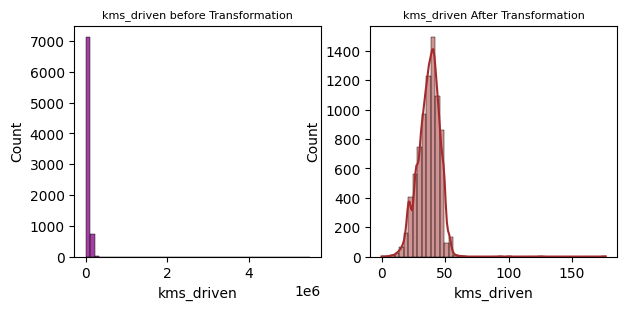

The skewness after transformation is : 0.3883571798646474


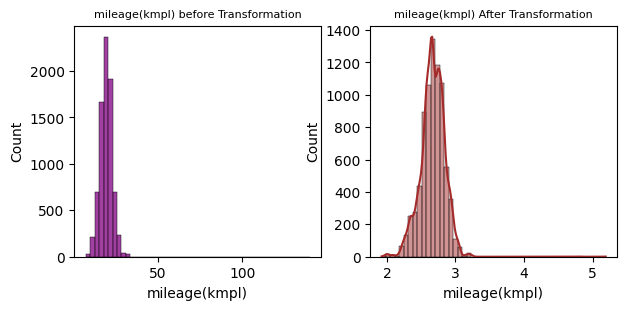

The skewness after transformation is : 0.24338261985963572


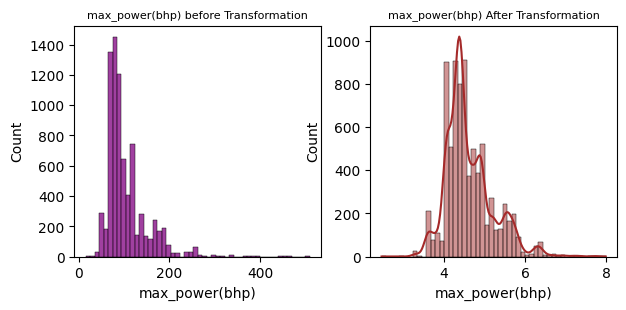

The skewness after transformation is : 1.0549518434688694


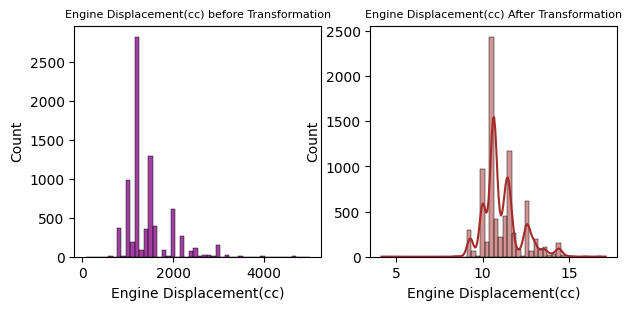

The skewness after transformation is : 0.9942986189762281


In [7]:
def plot(column):   
    
    plt.figure(figsize=(7,3))
    plt.subplot(1,2,1)
    plt.title(f"{column} before Transformation", fontsize=8)
    sns.histplot(data[column],bins=50 , color="purple")
    
    plt.subplot(1,2,2)
    plt.title(f"{column} After Transformation", fontsize=8)
    sns.histplot(df[column],bins=50, kde=True , color='brown')
    plt.xlabel(column)
    plt.show()
    
for col in columns:  
    plot(column= col)
    print('The skewness after transformation is :',df[col].skew())

## Treating the Outliers

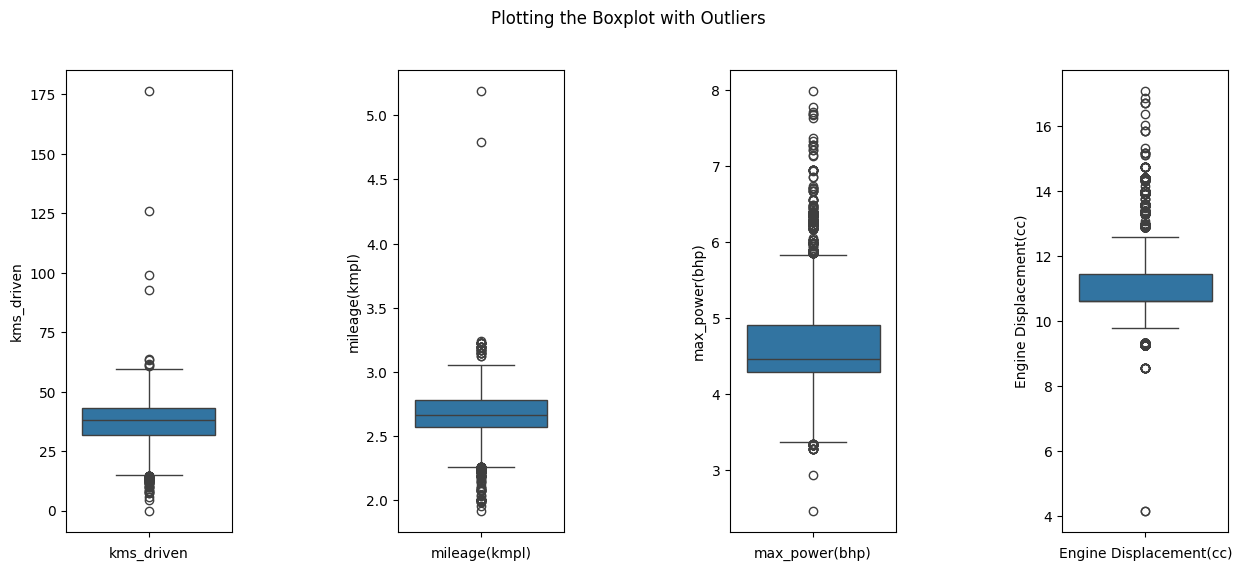

In [8]:
import matplotlib.pyplot as plt
# initialize figure with 6 subplots in a row
fig, ax = plt.subplots(1, 4,figsize=(15, 6))
fig.suptitle('Plotting the Boxplot with Outliers')
# add padding between the subplots
plt.subplots_adjust(wspace=1) 


# draw boxplot for each column in the each subplot
for i,val in enumerate(columns):
    sns.boxplot(data=df[val], ax=ax[i])
    ax[i].set_xlabel(val)

In [9]:
for column in columns:
    # IQR Detection
    # Calculate the upper and lower limits
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[column] = df[column].clip(lower, upper)

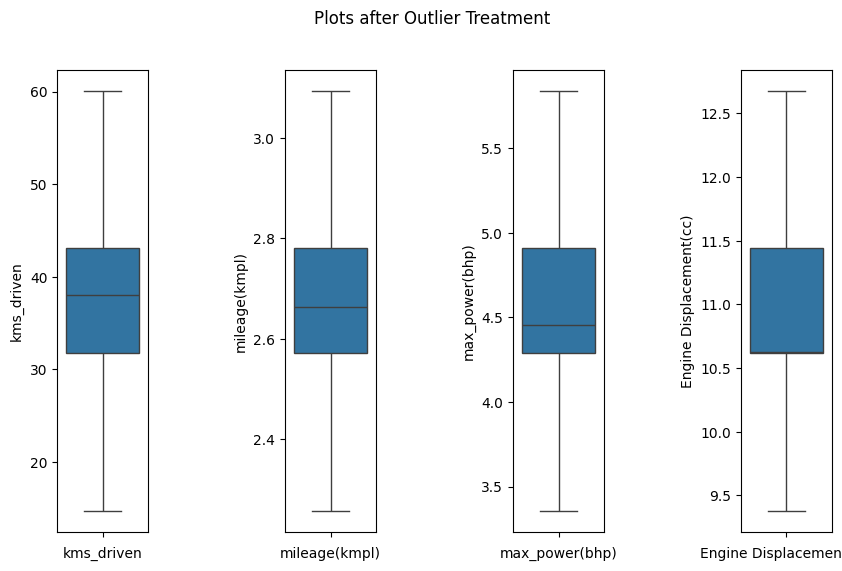

In [10]:
fig, ax = plt.subplots(1,4,figsize=(10,6))
fig.suptitle('Plots after Outlier Treatment')
# add padding between the subplots
plt.subplots_adjust(wspace=1.5) 


# draw boxplot for each column in the each subplot
for i,val in enumerate(columns):
    sns.boxplot(data=df[val], ax=ax[i])
    ax[i].set_xlabel(val)

In [11]:
for col in columns:
    df[col] = df[col].round(2)

### Feature Importance

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
X = df.drop('price',axis=1) #data,dropping target  
y = df['price'] #target

In [13]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
df = pd.DataFrame({"column":X.columns,"scores":model.feature_importances_}).sort_values('scores',ascending =False)
df

,column,scores
8,max_power(bhp),0.394275
12,Car_Age,0.145989
11,Engine Displacement(cc),0.115991
3,transmission_type,0.109438
2,kms_driven,0.050133
7,mileage(kmpl),0.041433
1,body_type,0.030791
6,model,0.028597
9,Seats,0.022670
0,Fuel Type,0.020214


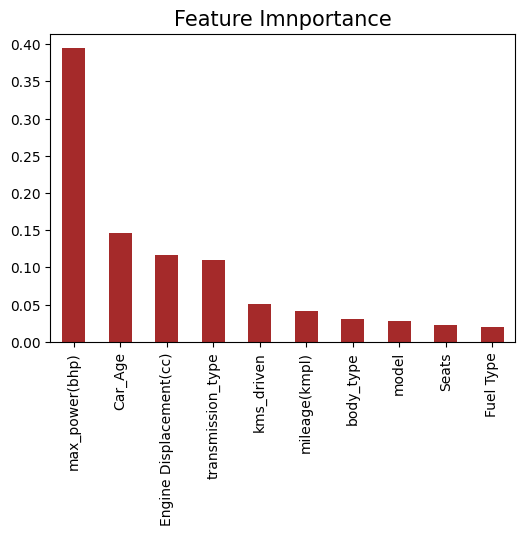

In [15]:
plt.figure(figsize= (6,4))
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'bar', color='brown')
plt.title('Feature Imnportance', fontsize=15)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### 1. Extra Trees Regressor

In [17]:
ext =ExtraTreesRegressor()
ext.fit(X_train,y_train)

ExtraTreesRegressor()

In [18]:
ex_train_pred = ext.predict(X_train)
ex_test_pred = ext.predict(X_test)

In [19]:
print("EXTRA TREE REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,ex_train_pred ))
print("MAE :",metrics.mean_absolute_error(y_train,ex_train_pred ))
print("MSE :",metrics.mean_squared_error(y_train,ex_train_pred ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,ex_train_pred )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,ex_test_pred))
print("MAE :",metrics.mean_absolute_error(y_test,ex_test_pred))
print("MSE :",metrics.mean_squared_error(y_test,ex_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,ex_test_pred)))

EXTRA TREE REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9998646148851064
MAE : 1879.2740740740735
MSE : 195149756.14814815
RMSE : 13969.601144919927
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.7274512147271754
MAE : 151988.54867724868
MSE : 278492132335.20154
RMSE : 527723.5377877336


### 2. Decision tree

In [20]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
dt_train = dt.predict(X_train)
dt_test = dt.predict(X_test)

In [22]:
print("Decision TREE REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,dt_train ))
print("MAE :",metrics.mean_absolute_error(y_train,dt_train ))
print("MSE :",metrics.mean_squared_error(y_train,dt_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,dt_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,dt_test))
print("MAE :",metrics.mean_absolute_error(y_test,dt_test))
print("MSE :",metrics.mean_squared_error(y_test,dt_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,dt_test)))

Decision TREE REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9998647034626914
MAE : 1867.2486772486768
MSE : 195022076.71957675
RMSE : 13965.03049476
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.24386288092868846
MAE : 219322.85714285713
MSE : 772625856384.4797
RMSE : 878991.3858420227


 ### 3. Linear Regression

In [23]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [24]:
lin_train = linear.predict(X_train)
lin_test = linear.predict(X_test)

In [25]:
print("Linear REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,lin_train ))
print("MAE :",metrics.mean_absolute_error(y_train,lin_train ))
print("MSE :",metrics.mean_squared_error(y_train,lin_train))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,lin_train)))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,lin_test))
print("MAE :",metrics.mean_absolute_error(y_test,lin_test))
print("MSE :",metrics.mean_squared_error(y_test,lin_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,lin_test)))

Linear REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.4862147688136812
MAE : 415516.5697770285
MSE : 740591479774.8705
RMSE : 860576.2486699657
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.5887948634320712
MAE : 395503.21213960304
MSE : 420172099447.65283
RMSE : 648206.8338483118


### 4. Random Forest Regressor

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

In [28]:
print("Random Forest REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,rf_train ))
print("MAE :",metrics.mean_absolute_error(y_train,rf_train ))
print("MSE :",metrics.mean_squared_error(y_train,rf_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,rf_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,rf_test))
print("MAE :",metrics.mean_absolute_error(y_test,rf_test))
print("MSE :",metrics.mean_squared_error(y_test,rf_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,rf_test)))

Random Forest REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9740340599993801
MAE : 57900.06354686319
MSE : 37428389843.7536
RMSE : 193464.1823277725
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.8184087305287677
MAE : 152621.17094482237
MSE : 185551147468.43124
RMSE : 430756.48279327294


### 5. XGB Regressor

In [29]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
xg_train = xgb.predict(X_train)
xg_test = xgb.predict(X_test)

In [31]:
print("XgBoost REGRESSION")
print("----------------------------")
print("Evaluating Train Data")
print("----------------------------")

print('R2 score:',metrics.r2_score(y_train,xg_train ))
print("MAE :",metrics.mean_absolute_error(y_train,xg_train ))
print("MSE :",metrics.mean_squared_error(y_train,xg_train ))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,xg_train )))

print('---------------------------------------------------------------')

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,xg_test))
print("MAE :",metrics.mean_absolute_error(y_test,xg_test))
print("MSE :",metrics.mean_squared_error(y_test,xg_test))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,xg_test)))

XgBoost REGRESSION
----------------------------
Evaluating Train Data
----------------------------
R2 score: 0.9951239527938385
MAE : 60619.329385540674
MSE : 7028537989.55094
RMSE : 83836.37629067074
---------------------------------------------------------------
Evaluating Test Data
-----------------------
R2 score: 0.6748835445706012
MAE : 155626.9137419395
MSE : 332206121700.9711
RMSE : 576373.2485993527


In [32]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [33]:
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=  rf, param_distributions=  random_grid, scoring= 'neg_mean_squared_error',
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1,error_score='raise')
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [37]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [38]:
predictions = rf_random.predict(X_test)

In [39]:
print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions))
print("MAE :",metrics.mean_absolute_error(y_test,predictions))
print("MSE :",metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Evaluating Test Data
-----------------------
R2 score: 0.8738607140754864
MAE : 139610.24639073515
MSE : 128889947805.83273
RMSE : 359012.46190882113


# Saving the model as pickle file

In [40]:
import pickle
with open('rf_model.pkl','wb') as file:
    pickle.dump(rf_random,file)

In [112]:
ip = [[4,2,35.33,1,2,20,138,2.88,4.06,5,2,9.99,5]]
round(model.predict(np.array(ip))[0],2)

e:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


377075.03